In [1]:
#IMPORTANT: 
#         Software Stack should be 91
#         No need for pbeast/beauty/beauty tools to be set-up

# This notebook illustrates the loss of accuracy for a different number of sampling rates when retrieving the run data.

#
# HOW TO USE:
# --> Run the next command, 
# -->click on the button to refresh page, say no to the pop-up window, 
# -->wait 10 seconds, click on the button to refresh window.
# -->Run the next command (again)   **This enables dynamic tools in the notebook**
#
# --> Run the rest of the commads in the notebook in sequence
# --> If everything workes, the last command will provide an interactive cell.

In [3]:
# Enable dynamic tools in the current notebook, in order to user the "interact" function.
!jupyter nbextension enable --py widgetsnbextension

Unrecognized JSON config file version, assuming version 1
Unrecognized JSON config file version, assuming version 1
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [4]:
%matplotlib notebook
import matplotlib
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import matplotlib.ticker as ticker

#these make the plots look more ATLAS-like
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)
import time

#pickle allows variables to be dumped in files, so that they can be loaded fast. later
import pickle

/cvmfs/sft.cern.ch/lcg/views/LCG_91/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
'''
file_ds.close()
file_timestamps.close()
file_data.close()

file_ds = open("../beauty_stuff/beuaty_stuff/ds.pickle",'wb') 
file_timestamps = open("../beauty_stuff/beuaty_stuff/timestamps.pickle",'wb') 
file_data = open("../beauty_stuff/beuaty_stuff/data.pickle",'wb')

pickle.dump(ds_array,file_ds)
pickle.dump(timestamps_array,file_timestamps)
pickle.dump(data_array,file_data)
'''

'\nfile_ds.close()\nfile_timestamps.close()\nfile_data.close()\n\nfile_ds = open("../beauty_stuff/beuaty_stuff/ds.pickle",\'wb\') \nfile_timestamps = open("../beauty_stuff/beuaty_stuff/timestamps.pickle",\'wb\') \nfile_data = open("../beauty_stuff/beuaty_stuff/data.pickle",\'wb\')\n\npickle.dump(ds_array,file_ds)\npickle.dump(timestamps_array,file_timestamps)\npickle.dump(data_array,file_data)\n'

In [2]:
#use pickle to load three variables from files.
# ds_array stores the downsampling rates
# timestamps_array stores the time values of each run
# data_array stores the actual data for each run ('HLT_Rate','HLT_j420')

#file_ds = open("../beauty_stuff/ds.pickle",'r') 
#ds_array = pickle.load(file_ds)  
##file_timestamps = open("../beauty_stuff/timestamps.pickle",'r') 
#timestamps_array = pickle.load(file_timestamps) 
#file_data = open("../beauty_stuff/data.pickle",'r')
#data_array = pickle.load(file_data)  


In [14]:
np.save("../beauty_stuff/beuaty_stuff/ds", ds_array)
np.save("../beauty_stuff/beuaty_stuff/timestamps", timestamps_array)
np.save("../beauty_stuff/beuaty_stuff/data", data_array)

In [5]:
ds_array = np.load('ds.npy');
timestamps_array = np.load('timestamps.npy');
data_array = np.load('data.npy');

In [6]:
#import the rest of the tools to enable the interact function
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [7]:
def plotthem(x):
    plt.close('all')
    axes = plt.gca()
    axes.set_ylim([0,40])
    title = 'Downsampling = ' + str(ds_array[x])
    plt.title(title)
    plt.ylabel('HLT_j420 rate')
    plt.xlabel('Time (hours)')
    plt.plot(timestamps_array[x],data_array[x])
    filename = "niceplots" + str(x) + ".png"
    plt.savefig(filename)

<IPython.core.display.Javascript object>


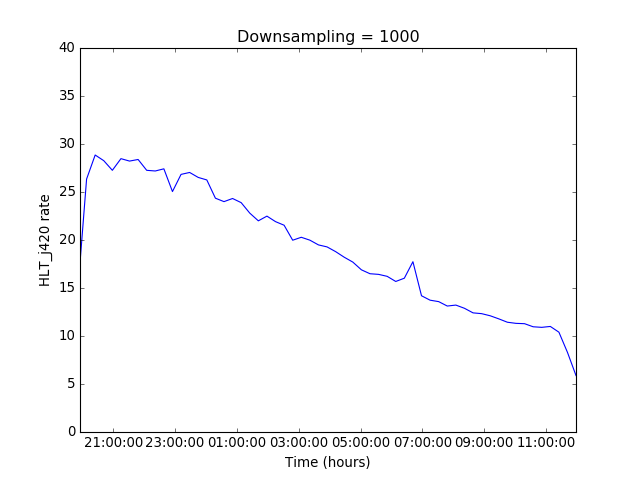

In [8]:
interact(plotthem, x=[0,10]);